In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, datasets

# **MNIST dataset**

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [4]:
# displaying one image (pixel values range from 0 to 255)
pd.DataFrame(X_train[12])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,12,99,91,142,155,246,182,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,138,254,254,254,254,254,254,...,33,0,0,0,0,0,0,0,0,0
7,0,0,0,220,254,254,254,235,189,189,...,75,0,0,0,0,0,0,0,0,0
8,0,0,0,35,74,35,35,25,0,0,...,153,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,53,0,0,0,0,0,0,0,0,0


In [5]:
# normalization
X_train = X_train/255
X_test = X_test/255

In [6]:
# define model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [7]:
# compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train model
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.8839 - val_loss: 0.2063 - val_accuracy: 0.9412
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1862 - accuracy: 0.9465 - val_loss: 0.1570 - val_accuracy: 0.9525
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1463 - accuracy: 0.9572 - val_loss: 0.1369 - val_accuracy: 0.9584
Epoch 4/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1242 - accuracy: 0.9633 - val_loss: 0.1493 - val_accuracy: 0.9542
Epoch 5/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1082 - accuracy: 0.9677 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 6/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0976 - accuracy: 0.9698 - val_loss: 0.1300 - val_accuracy: 0.9612
Epoch 7/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0884 - accuracy: 0.9731 - val_loss: 0.1156 - val_accuracy:

Text(0, 0.5, 'Accuracy')

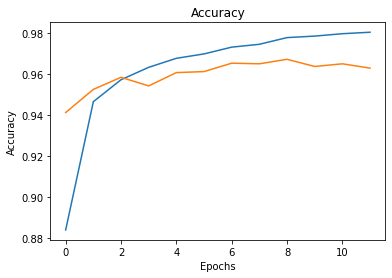

In [10]:
# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

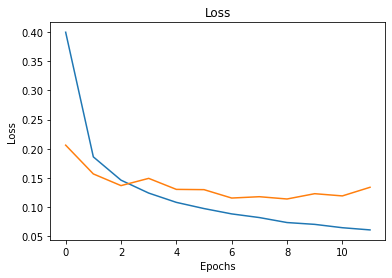

In [11]:
# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")